In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('/content/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
null=df.isnull().sum()
ratio=null/df.shape[0]
pd.DataFrame({'null':null,'ratio':ratio}).T


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 simple linear regression & calculate the MSE

In [ ]:
corr=df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [ ]:
X=df[['RM']]
y=df['MEDV']


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
simple_preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),['RM'])
    ]
)

In [ ]:
simple_pipeline=Pipeline(steps=[
    ('preprocessor',simple_preprocessor),
    ('regressor',LinearRegression())
])

In [ ]:
simple_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['RM'])])),
                ('regressor', LinearRegression())])

In [ ]:
Y_pred_linear=simple_pipeline.predict(X_test)

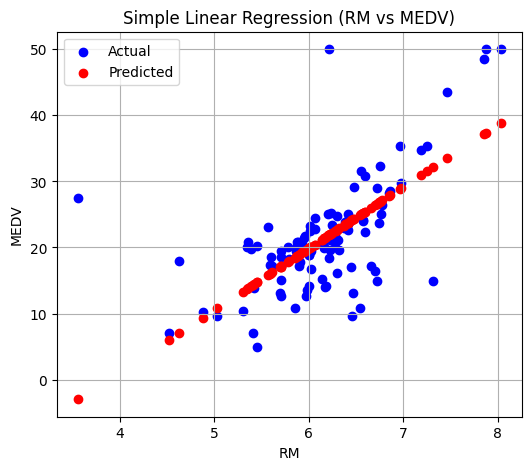

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, Y_pred_linear, color='red', label='Predicted')
plt.title('Simple Linear Regression (RM vs MEDV)')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
MSE_linear=mean_squared_error(y_test,Y_pred_linear)
MSE_linear

46.144775347317264

multiple linear regression & calculate the MSE

In [ ]:
X_multi=df.iloc[:, :-1]
y_multi=df.iloc[:, -1]

In [ ]:
X_train_multi,X_test_multi,y_train_multi,y_test_multi=train_test_split(X_multi,y_multi,test_size=0.2,random_state=42)

In [ ]:
num_cols_features=X_multi.columns.tolist()


In [ ]:
multi_preprocessor=ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),num_cols_features)
    ]
)

In [ ]:
multi_pipeline=Pipeline(steps=[
    ('preprocessor',multi_preprocessor),
    ('regressor',LinearRegression())
])

In [ ]:
multi_pipeline.fit(X_train_multi,y_train_multi)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CRIM', 'ZN', 'INDUS',
                                                   'CHAS', 'NOX', 'RM', 'AGE',
                                                   'DIS', 'RAD', 'TAX',
                                                   'PTRATIO', 'B',
                                                   'LSTAT'])])),
                ('regressor', LinearRegression())])

In [ ]:
Y_pred_mlr=multi_pipeline.predict(X_test_multi)

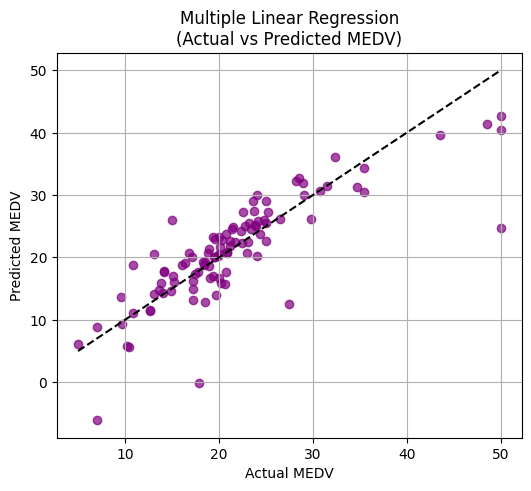

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test_multi, Y_pred_mlr, color='purple', alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--')
plt.title('Multiple Linear Regression\n(Actual vs Predicted MEDV)')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.grid(True)
plt.show()

In [ ]:
MSE_mlr=mean_squared_error(y_test,Y_pred_mlr)
MSE_mlr
#the same for linear regression

24.291119474973513

polynomial regression & calculate the MSE

In [ ]:
poly_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('scaler', StandardScaler()),
                ('poly', PolynomialFeatures(degree=2))
            ]), num_cols_features)
        ])),
    ('regressor', LinearRegression())
])


In [ ]:
poly_pipeline.fit(X_train_multi, y_train_multi)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  ['CRIM', 'ZN', 'INDUS',
                                                   'CHAS', 'NOX', 'RM', 'AGE',
                                                   'DIS', 'RAD', 'TAX',
                                                   'PTRATIO', 'B',
                                                   'LSTAT'])])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred_poly = poly_pipeline.predict(X_test_multi)

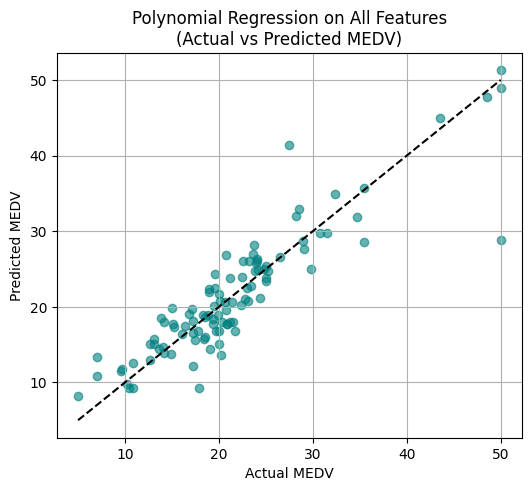

In [ ]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test_multi, y_pred_poly, color='teal', alpha=0.6)
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], color='black', linestyle='--')
plt.title('Polynomial Regression on All Features\n(Actual vs Predicted MEDV)')
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.grid(True)
plt.show()

In [ ]:

MSE_poly = mean_squared_error(y_test_multi, y_pred_poly)
print("Polynomial Regression MSE:", MSE_poly)

Polynomial Regression MSE: 14.257338168909532


In [ ]:
print("Linear Regression MSE:", MSE_linear)
print("Polynomial Regression MSE:", MSE_poly)

if MSE_poly < MSE_linear:
    print("The best model  : Polynomial Regression")
else:
    print(" The best model : Linear Regression")

Linear Regression MSE: 46.144775347317264
Polynomial Regression MSE: 14.257338168909532
The best model  : Polynomial Regression
